In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import load_image, ImageQuant2, raw_data_path
np.random.seed(12345)
%matplotlib widget

In [2]:
# Import cytoplasmic profile
cytbg = np.loadtxt('../../data/calibration_cyt.txt')

# Import embryos dataframe
df = pd.read_csv('../../data/par2_nebd_embryos.csv')

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('../../data/calibration_embryos.csv')

In [3]:
# Import data
df = pd.read_csv('../../data/calibration_embryos.csv')
if raw_data_path:
    df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

10


In [4]:
# Global calibration parameters
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### Calibration 1 (WT)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:01<19:00,  1.14s/it]

  1%|█▊                                                                                                                                             | 13/1000 [00:01<01:10, 14.10it/s]

  3%|███▋                                                                                                                                           | 26/1000 [00:01<00:32, 29.63it/s]

  4%|█████▍                                                                                                                                         | 38/1000 [00:01<00:22, 43.73it/s]

  5%|███████▏                                                                                                                                       | 50/1000 [00:01<00:16, 57.92it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:13, 70.69it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:11, 81.80it/s]

  9%|████████████▍                                                                                                                                  | 87/1000 [00:01<00:10, 91.27it/s]

 10%|██████████████▏                                                                                                                                | 99/1000 [00:02<00:09, 91.97it/s]

 11%|███████████████▉                                                                                                                              | 112/1000 [00:02<00:08, 99.86it/s]

 12%|█████████████████▍                                                                                                                           | 124/1000 [00:02<00:08, 104.66it/s]

 14%|███████████████████▎                                                                                                                          | 136/1000 [00:02<00:08, 99.88it/s]

 15%|████████████████████▊                                                                                                                         | 147/1000 [00:02<00:09, 92.04it/s]

 16%|██████████████████████▎                                                                                                                       | 157/1000 [00:02<00:09, 88.76it/s]

 17%|███████████████████████▉                                                                                                                      | 169/1000 [00:02<00:08, 95.02it/s]

 18%|█████████████████████████▍                                                                                                                    | 179/1000 [00:02<00:08, 95.82it/s]

 19%|██████████████████████████▊                                                                                                                   | 189/1000 [00:02<00:08, 90.13it/s]

 20%|████████████████████████████▎                                                                                                                 | 199/1000 [00:03<00:09, 87.73it/s]

 21%|█████████████████████████████▌                                                                                                                | 208/1000 [00:03<00:09, 87.00it/s]

 22%|███████████████████████████████                                                                                                               | 219/1000 [00:03<00:08, 91.67it/s]

 23%|████████████████████████████████▊                                                                                                             | 231/1000 [00:03<00:07, 97.50it/s]

 24%|██████████████████████████████████▍                                                                                                          | 244/1000 [00:03<00:07, 104.53it/s]

 26%|████████████████████████████████████▏                                                                                                        | 257/1000 [00:03<00:06, 110.55it/s]

 27%|██████████████████████████████████████                                                                                                       | 270/1000 [00:03<00:06, 115.01it/s]

 28%|███████████████████████████████████████▉                                                                                                     | 283/1000 [00:03<00:06, 117.67it/s]

 30%|█████████████████████████████████████████▉                                                                                                   | 297/1000 [00:03<00:05, 121.60it/s]

 31%|███████████████████████████████████████████▋                                                                                                 | 310/1000 [00:04<00:05, 121.99it/s]

 32%|█████████████████████████████████████████████▋                                                                                               | 324/1000 [00:04<00:05, 124.08it/s]

 34%|███████████████████████████████████████████████▌                                                                                             | 337/1000 [00:04<00:05, 121.80it/s]

 35%|█████████████████████████████████████████████████▎                                                                                           | 350/1000 [00:04<00:05, 112.04it/s]

 36%|███████████████████████████████████████████████████▏                                                                                         | 363/1000 [00:04<00:05, 116.50it/s]

 38%|█████████████████████████████████████████████████████                                                                                        | 376/1000 [00:04<00:05, 118.07it/s]

 39%|██████████████████████████████████████████████████████▊                                                                                      | 389/1000 [00:04<00:05, 120.18it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                    | 402/1000 [00:04<00:04, 121.68it/s]

 42%|██████████████████████████████████████████████████████████▌                                                                                  | 415/1000 [00:04<00:04, 122.98it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:04<00:04, 123.86it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                              | 441/1000 [00:05<00:04, 124.10it/s]

 45%|████████████████████████████████████████████████████████████████                                                                             | 454/1000 [00:05<00:04, 122.66it/s]

 47%|█████████████████████████████████████████████████████████████████▊                                                                           | 467/1000 [00:05<00:04, 123.95it/s]

 48%|███████████████████████████████████████████████████████████████████▋                                                                         | 480/1000 [00:05<00:04, 124.17it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                       | 493/1000 [00:05<00:04, 124.97it/s]

 51%|███████████████████████████████████████████████████████████████████████▍                                                                     | 507/1000 [00:05<00:03, 126.72it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                   | 520/1000 [00:05<00:03, 126.16it/s]

 53%|███████████████████████████████████████████████████████████████████████████▏                                                                 | 533/1000 [00:05<00:03, 126.02it/s]

 55%|████████████████████████████████████████████████████████████████████████████▉                                                                | 546/1000 [00:05<00:03, 125.38it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                              | 559/1000 [00:06<00:03, 124.33it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▋                                                            | 572/1000 [00:06<00:03, 113.35it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:06<00:04, 102.50it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▍                                                         | 595/1000 [00:06<00:04, 98.27it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████                                                        | 606/1000 [00:06<00:04, 92.04it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                      | 616/1000 [00:06<00:04, 88.07it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 626/1000 [00:06<00:04, 89.60it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 639/1000 [00:06<00:03, 98.52it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████                                                 | 653/1000 [00:07<00:03, 108.52it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 666/1000 [00:07<00:02, 113.39it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:07<00:02, 111.40it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:07<00:03, 101.72it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 701/1000 [00:07<00:03, 93.08it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 712/1000 [00:07<00:03, 95.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 722/1000 [00:07<00:02, 94.03it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 732/1000 [00:07<00:02, 89.39it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 742/1000 [00:08<00:02, 87.98it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 751/1000 [00:08<00:03, 79.65it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 760/1000 [00:08<00:03, 79.63it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 770/1000 [00:08<00:02, 83.35it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 783/1000 [00:08<00:02, 93.90it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 795/1000 [00:08<00:02, 99.01it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:08<00:01, 104.21it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 818/1000 [00:08<00:01, 99.71it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 829/1000 [00:08<00:01, 100.79it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 840/1000 [00:09<00:01, 99.35it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 851/1000 [00:09<00:01, 95.00it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 861/1000 [00:09<00:01, 93.19it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 871/1000 [00:09<00:01, 90.24it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 881/1000 [00:09<00:01, 92.39it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:09<00:01, 92.99it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 902/1000 [00:09<00:01, 95.39it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 914/1000 [00:09<00:00, 100.99it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 927/1000 [00:09<00:00, 108.55it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 940/1000 [00:10<00:00, 112.84it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 952/1000 [00:10<00:00, 113.88it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 965/1000 [00:10<00:00, 117.76it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:10<00:00, 122.24it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:10<00:00, 125.10it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.34it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

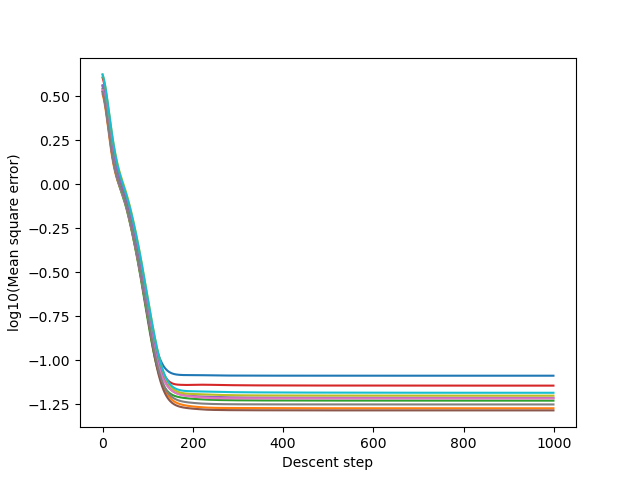

In [5]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:56,  1.67it/s]

  1%|█▋                                                                                                                                             | 12/1000 [00:00<00:43, 22.48it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:00<00:24, 40.70it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:00<00:15, 60.61it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:12, 75.04it/s]

  6%|████████▋                                                                                                                                      | 61/1000 [00:01<00:10, 88.34it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:09, 98.94it/s]

  9%|████████████▎                                                                                                                                 | 87/1000 [00:01<00:08, 106.28it/s]

 10%|██████████████                                                                                                                               | 100/1000 [00:01<00:08, 111.57it/s]

 11%|███████████████▉                                                                                                                             | 113/1000 [00:01<00:07, 116.02it/s]

 13%|█████████████████▊                                                                                                                           | 126/1000 [00:01<00:07, 116.07it/s]

 14%|███████████████████▌                                                                                                                         | 139/1000 [00:01<00:07, 118.55it/s]

 15%|█████████████████████▍                                                                                                                       | 152/1000 [00:01<00:07, 118.64it/s]

 16%|███████████████████████▎                                                                                                                     | 165/1000 [00:01<00:06, 120.70it/s]

 18%|█████████████████████████                                                                                                                    | 178/1000 [00:02<00:06, 121.62it/s]

 19%|██████████████████████████▉                                                                                                                  | 191/1000 [00:02<00:06, 122.17it/s]

 20%|████████████████████████████▊                                                                                                                | 204/1000 [00:02<00:07, 111.00it/s]

 22%|██████████████████████████████▍                                                                                                              | 216/1000 [00:02<00:07, 111.87it/s]

 23%|████████████████████████████████▎                                                                                                            | 229/1000 [00:02<00:06, 115.78it/s]

 24%|██████████████████████████████████                                                                                                           | 242/1000 [00:02<00:06, 118.59it/s]

 26%|███████████████████████████████████▉                                                                                                         | 255/1000 [00:02<00:06, 121.16it/s]

 27%|█████████████████████████████████████▊                                                                                                       | 268/1000 [00:02<00:05, 123.40it/s]

 28%|███████████████████████████████████████▌                                                                                                     | 281/1000 [00:02<00:05, 124.97it/s]

 29%|█████████████████████████████████████████▍                                                                                                   | 294/1000 [00:03<00:05, 123.57it/s]

 31%|███████████████████████████████████████████▎                                                                                                 | 307/1000 [00:03<00:05, 124.75it/s]

 32%|█████████████████████████████████████████████                                                                                                | 320/1000 [00:03<00:05, 125.97it/s]

 33%|██████████████████████████████████████████████▉                                                                                              | 333/1000 [00:03<00:05, 123.95it/s]

 35%|████████████████████████████████████████████████▊                                                                                            | 346/1000 [00:03<00:05, 125.61it/s]

 36%|██████████████████████████████████████████████████▌                                                                                          | 359/1000 [00:03<00:05, 124.91it/s]

 37%|████████████████████████████████████████████████████▍                                                                                        | 372/1000 [00:03<00:04, 126.31it/s]

 38%|██████████████████████████████████████████████████████▎                                                                                      | 385/1000 [00:03<00:04, 123.81it/s]

 40%|████████████████████████████████████████████████████████                                                                                     | 398/1000 [00:03<00:04, 124.48it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                   | 411/1000 [00:03<00:04, 124.09it/s]

 42%|███████████████████████████████████████████████████████████▊                                                                                 | 424/1000 [00:04<00:04, 124.51it/s]

 44%|█████████████████████████████████████████████████████████████▌                                                                               | 437/1000 [00:04<00:04, 125.22it/s]

 45%|███████████████████████████████████████████████████████████████▍                                                                             | 450/1000 [00:04<00:04, 125.19it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                           | 463/1000 [00:04<00:04, 126.06it/s]

 48%|███████████████████████████████████████████████████████████████████                                                                          | 476/1000 [00:04<00:04, 124.87it/s]

 49%|████████████████████████████████████████████████████████████████████▉                                                                        | 489/1000 [00:04<00:04, 125.27it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                      | 502/1000 [00:04<00:04, 123.81it/s]

 52%|████████████████████████████████████████████████████████████████████████▌                                                                    | 515/1000 [00:04<00:04, 119.13it/s]

 53%|██████████████████████████████████████████████████████████████████████████▎                                                                  | 527/1000 [00:04<00:03, 118.58it/s]

 54%|███████████████████████████████████████████████████████████████████████████▉                                                                 | 539/1000 [00:05<00:03, 115.36it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                               | 551/1000 [00:05<00:04, 109.42it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▍                                                             | 563/1000 [00:05<00:03, 111.75it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                           | 576/1000 [00:05<00:03, 115.25it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                          | 588/1000 [00:05<00:03, 114.34it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 600/1000 [00:05<00:03, 114.15it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                      | 613/1000 [00:05<00:03, 116.45it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 626/1000 [00:05<00:03, 118.06it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████                                                   | 639/1000 [00:05<00:03, 118.97it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 652/1000 [00:06<00:02, 120.49it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 665/1000 [00:06<00:02, 122.47it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:06<00:02, 120.25it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 691/1000 [00:06<00:02, 121.23it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 704/1000 [00:06<00:02, 121.69it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 717/1000 [00:06<00:02, 120.20it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 730/1000 [00:06<00:02, 120.40it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 743/1000 [00:06<00:02, 120.78it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 756/1000 [00:06<00:02, 120.96it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 769/1000 [00:06<00:01, 120.95it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 782/1000 [00:07<00:01, 121.22it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 795/1000 [00:07<00:01, 119.97it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 808/1000 [00:07<00:01, 108.21it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 820/1000 [00:07<00:02, 89.82it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 830/1000 [00:07<00:02, 79.50it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 839/1000 [00:08<00:03, 49.38it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 846/1000 [00:08<00:03, 49.97it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 854/1000 [00:08<00:02, 54.65it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 861/1000 [00:08<00:02, 53.12it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 870/1000 [00:08<00:02, 60.15it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 878/1000 [00:08<00:01, 64.18it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:08<00:01, 79.61it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 904/1000 [00:08<00:01, 91.81it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 916/1000 [00:08<00:00, 97.18it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 928/1000 [00:09<00:00, 101.30it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 940/1000 [00:09<00:00, 105.69it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 953/1000 [00:09<00:00, 111.17it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 967/1000 [00:09<00:00, 117.97it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:09<00:00, 118.32it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 992/1000 [00:09<00:00, 121.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.16it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

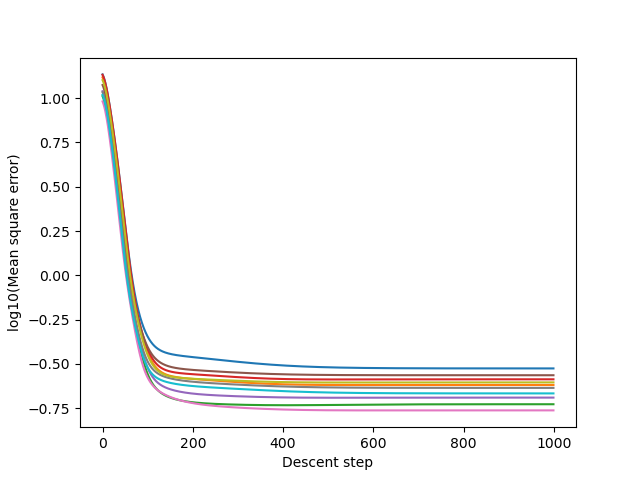

In [6]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:13,  1.80it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:35, 27.65it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:19, 50.06it/s]

  4%|█████▋                                                                                                                                         | 40/1000 [00:00<00:14, 68.44it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:00<00:11, 83.70it/s]

  7%|█████████▍                                                                                                                                     | 66/1000 [00:01<00:09, 95.44it/s]

  8%|███████████▏                                                                                                                                  | 79/1000 [00:01<00:08, 104.04it/s]

  9%|█████████████                                                                                                                                 | 92/1000 [00:01<00:08, 109.15it/s]

 10%|██████████████▊                                                                                                                              | 105/1000 [00:01<00:08, 107.33it/s]

 12%|████████████████▌                                                                                                                             | 117/1000 [00:01<00:09, 95.90it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:08, 102.74it/s]

 14%|████████████████████▏                                                                                                                        | 143/1000 [00:01<00:07, 109.57it/s]

 16%|█████████████████████▉                                                                                                                       | 156/1000 [00:01<00:07, 113.85it/s]

 17%|███████████████████████▋                                                                                                                     | 168/1000 [00:01<00:07, 114.74it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:06, 117.68it/s]

 19%|███████████████████████████▏                                                                                                                 | 193/1000 [00:02<00:06, 116.12it/s]

 20%|████████████████████████████▉                                                                                                                | 205/1000 [00:02<00:07, 110.31it/s]

 22%|██████████████████████████████▌                                                                                                              | 217/1000 [00:02<00:07, 108.75it/s]

 23%|████████████████████████████████▏                                                                                                            | 228/1000 [00:02<00:07, 104.42it/s]

 24%|█████████████████████████████████▉                                                                                                            | 239/1000 [00:02<00:07, 99.24it/s]

 25%|███████████████████████████████████▌                                                                                                          | 250/1000 [00:02<00:07, 98.58it/s]

 26%|████████████████████████████████████▉                                                                                                        | 262/1000 [00:02<00:07, 103.35it/s]

 27%|██████████████████████████████████████▍                                                                                                      | 273/1000 [00:03<00:07, 100.98it/s]

 28%|████████████████████████████████████████▎                                                                                                     | 284/1000 [00:03<00:07, 91.61it/s]

 29%|█████████████████████████████████████████▋                                                                                                    | 294/1000 [00:03<00:09, 73.40it/s]

 30%|██████████████████████████████████████████▉                                                                                                   | 302/1000 [00:03<00:10, 68.65it/s]

 31%|████████████████████████████████████████████▏                                                                                                 | 311/1000 [00:03<00:09, 71.81it/s]

 32%|█████████████████████████████████████████████▎                                                                                                | 319/1000 [00:03<00:09, 72.12it/s]

 33%|███████████████████████████████████████████████                                                                                               | 331/1000 [00:03<00:07, 83.85it/s]

 34%|████████████████████████████████████████████████▊                                                                                             | 344/1000 [00:03<00:06, 94.71it/s]

 36%|██████████████████████████████████████████████████▏                                                                                          | 356/1000 [00:04<00:06, 101.39it/s]

 37%|███████████████████████████████████████████████████▋                                                                                         | 367/1000 [00:04<00:06, 102.15it/s]

 38%|█████████████████████████████████████████████████████▋                                                                                        | 378/1000 [00:04<00:08, 76.84it/s]

 39%|██████████████████████████████████████████████████████▉                                                                                       | 387/1000 [00:04<00:09, 63.37it/s]

 40%|████████████████████████████████████████████████████████                                                                                      | 395/1000 [00:04<00:13, 45.40it/s]

 40%|████████████████████████████████████████████████████████▉                                                                                     | 401/1000 [00:05<00:12, 47.23it/s]

 41%|██████████████████████████████████████████████████████████▌                                                                                   | 412/1000 [00:05<00:09, 58.97it/s]

 42%|████████████████████████████████████████████████████████████▏                                                                                 | 424/1000 [00:05<00:08, 71.93it/s]

 44%|█████████████████████████████████████████████████████████████▉                                                                                | 436/1000 [00:05<00:06, 83.03it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                              | 448/1000 [00:05<00:05, 92.03it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                            | 460/1000 [00:05<00:05, 97.40it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                          | 473/1000 [00:05<00:05, 104.77it/s]

 49%|████████████████████████████████████████████████████████████████████▌                                                                        | 486/1000 [00:05<00:04, 111.18it/s]

 50%|██████████████████████████████████████████████████████████████████████▏                                                                      | 498/1000 [00:05<00:04, 111.97it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                     | 510/1000 [00:05<00:04, 110.46it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                    | 522/1000 [00:06<00:05, 87.91it/s]

 53%|███████████████████████████████████████████████████████████████████████████▌                                                                  | 532/1000 [00:06<00:05, 87.23it/s]

 54%|████████████████████████████████████████████████████████████████████████████▉                                                                 | 542/1000 [00:06<00:05, 86.87it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▍                                                               | 552/1000 [00:06<00:05, 86.46it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▋                                                              | 561/1000 [00:06<00:06, 66.77it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▎                                                            | 573/1000 [00:06<00:05, 77.56it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████                                                           | 585/1000 [00:06<00:04, 87.20it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 597/1000 [00:07<00:04, 93.63it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                       | 609/1000 [00:07<00:03, 98.87it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                     | 621/1000 [00:07<00:03, 103.14it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 633/1000 [00:07<00:03, 105.71it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:07<00:03, 106.76it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 658/1000 [00:07<00:03, 111.04it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 670/1000 [00:07<00:02, 112.53it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 683/1000 [00:07<00:02, 115.21it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 696/1000 [00:07<00:02, 117.20it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 709/1000 [00:07<00:02, 119.53it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 722/1000 [00:08<00:02, 122.25it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 735/1000 [00:08<00:02, 121.78it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 748/1000 [00:08<00:02, 119.75it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 761/1000 [00:08<00:02, 105.72it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 772/1000 [00:08<00:02, 106.62it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 784/1000 [00:08<00:01, 108.17it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 795/1000 [00:08<00:01, 108.27it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:08<00:01, 109.96it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 819/1000 [00:08<00:01, 112.41it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 831/1000 [00:09<00:01, 114.03it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 843/1000 [00:09<00:01, 114.41it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 856/1000 [00:09<00:01, 117.90it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 868/1000 [00:09<00:01, 114.07it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 881/1000 [00:09<00:01, 117.91it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 893/1000 [00:09<00:00, 117.42it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 905/1000 [00:09<00:00, 117.74it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 917/1000 [00:09<00:00, 101.99it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 928/1000 [00:10<00:00, 93.07it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 938/1000 [00:10<00:00, 90.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 948/1000 [00:10<00:00, 87.62it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:10<00:00, 85.30it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 966/1000 [00:10<00:00, 83.34it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 978/1000 [00:10<00:00, 91.16it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:10<00:00, 101.27it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.94it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

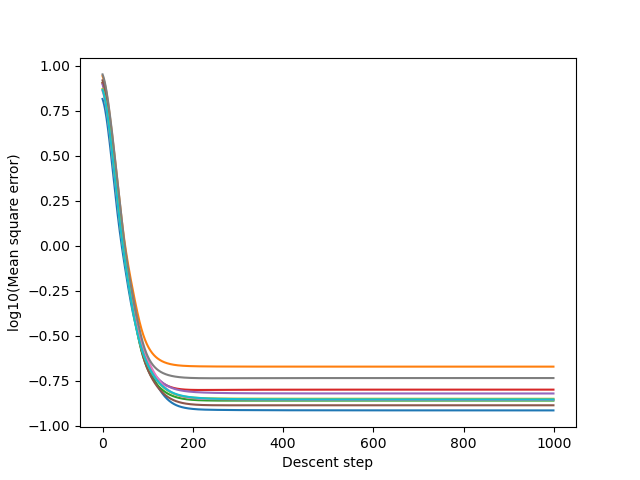

In [7]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:55,  1.68it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:37, 26.23it/s]

  3%|███▋                                                                                                                                           | 26/1000 [00:00<00:21, 45.84it/s]

  4%|█████▌                                                                                                                                         | 39/1000 [00:00<00:14, 64.99it/s]

  5%|███████▍                                                                                                                                       | 52/1000 [00:01<00:11, 80.36it/s]

  6%|█████████▎                                                                                                                                     | 65/1000 [00:01<00:10, 91.94it/s]

  8%|███████████                                                                                                                                    | 77/1000 [00:01<00:09, 98.72it/s]

  9%|████████████▊                                                                                                                                 | 90/1000 [00:01<00:08, 105.45it/s]

 10%|██████████████▌                                                                                                                              | 103/1000 [00:01<00:08, 111.47it/s]

 12%|████████████████▎                                                                                                                            | 116/1000 [00:01<00:07, 114.85it/s]

 13%|██████████████████▏                                                                                                                          | 129/1000 [00:01<00:07, 115.96it/s]

 14%|████████████████████                                                                                                                         | 142/1000 [00:01<00:07, 115.66it/s]

 16%|█████████████████████▊                                                                                                                       | 155/1000 [00:01<00:07, 117.68it/s]

 17%|███████████████████████▋                                                                                                                     | 168/1000 [00:01<00:06, 119.50it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:06, 120.41it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:02<00:06, 120.38it/s]

 21%|█████████████████████████████▏                                                                                                               | 207/1000 [00:02<00:06, 120.64it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:06, 120.69it/s]

 23%|████████████████████████████████▊                                                                                                            | 233/1000 [00:02<00:06, 120.96it/s]

 25%|██████████████████████████████████▋                                                                                                          | 246/1000 [00:02<00:06, 120.76it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:02<00:06, 119.62it/s]

 27%|██████████████████████████████████████▏                                                                                                      | 271/1000 [00:02<00:06, 105.35it/s]

 28%|███████████████████████████████████████▊                                                                                                     | 282/1000 [00:02<00:06, 105.00it/s]

 30%|█████████████████████████████████████████▌                                                                                                   | 295/1000 [00:03<00:06, 109.77it/s]

 31%|███████████████████████████████████████████▍                                                                                                 | 308/1000 [00:03<00:06, 113.98it/s]

 32%|█████████████████████████████████████████████▎                                                                                               | 321/1000 [00:03<00:05, 115.97it/s]

 33%|███████████████████████████████████████████████                                                                                              | 334/1000 [00:03<00:05, 118.05it/s]

 35%|████████████████████████████████████████████████▉                                                                                            | 347/1000 [00:03<00:05, 120.00it/s]

 36%|██████████████████████████████████████████████████▊                                                                                          | 360/1000 [00:03<00:05, 122.09it/s]

 37%|████████████████████████████████████████████████████▌                                                                                        | 373/1000 [00:03<00:05, 123.53it/s]

 39%|██████████████████████████████████████████████████████▍                                                                                      | 386/1000 [00:03<00:05, 122.51it/s]

 40%|████████████████████████████████████████████████████████▎                                                                                    | 399/1000 [00:03<00:05, 115.65it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                   | 411/1000 [00:04<00:05, 101.48it/s]

 42%|███████████████████████████████████████████████████████████▌                                                                                 | 422/1000 [00:04<00:05, 100.64it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                | 433/1000 [00:04<00:05, 102.52it/s]

 44%|██████████████████████████████████████████████████████████████▋                                                                              | 445/1000 [00:04<00:05, 105.51it/s]

 46%|████████████████████████████████████████████████████████████████▍                                                                            | 457/1000 [00:04<00:05, 107.77it/s]

 47%|██████████████████████████████████████████████████████████████████▏                                                                          | 469/1000 [00:04<00:04, 109.46it/s]

 48%|███████████████████████████████████████████████████████████████████▊                                                                         | 481/1000 [00:04<00:04, 108.80it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                       | 493/1000 [00:04<00:04, 110.21it/s]

 51%|███████████████████████████████████████████████████████████████████████▎                                                                     | 506/1000 [00:04<00:04, 114.06it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                   | 519/1000 [00:05<00:04, 118.08it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                  | 532/1000 [00:05<00:03, 120.10it/s]

 55%|████████████████████████████████████████████████████████████████████████████▊                                                                | 545/1000 [00:05<00:03, 121.16it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:05<00:03, 121.95it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▌                                                            | 571/1000 [00:05<00:03, 122.82it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:05<00:03, 124.04it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▏                                                        | 597/1000 [00:05<00:03, 124.99it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████                                                       | 610/1000 [00:05<00:03, 121.60it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▊                                                     | 623/1000 [00:05<00:03, 123.41it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 636/1000 [00:05<00:02, 124.76it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 649/1000 [00:06<00:02, 126.08it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 662/1000 [00:06<00:02, 121.86it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 675/1000 [00:06<00:02, 121.53it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████                                            | 688/1000 [00:06<00:02, 122.83it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 701/1000 [00:06<00:02, 124.56it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 714/1000 [00:06<00:02, 125.51it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 728/1000 [00:06<00:02, 127.04it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 741/1000 [00:06<00:02, 126.80it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 754/1000 [00:06<00:01, 127.64it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 767/1000 [00:07<00:02, 112.29it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 779/1000 [00:07<00:02, 106.33it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 790/1000 [00:07<00:02, 100.41it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 801/1000 [00:07<00:02, 99.19it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 812/1000 [00:07<00:01, 101.22it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:07<00:01, 106.10it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 836/1000 [00:07<00:01, 108.53it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 848/1000 [00:07<00:01, 109.15it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 861/1000 [00:07<00:01, 113.04it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 874/1000 [00:08<00:01, 115.59it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 886/1000 [00:08<00:00, 116.12it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 899/1000 [00:08<00:00, 118.00it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 911/1000 [00:08<00:00, 117.16it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 924/1000 [00:08<00:00, 118.41it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:08<00:00, 118.40it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 949/1000 [00:08<00:00, 119.23it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 961/1000 [00:08<00:00, 119.24it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:08<00:00, 119.06it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:09<00:00, 120.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:09<00:00, 119.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.41it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

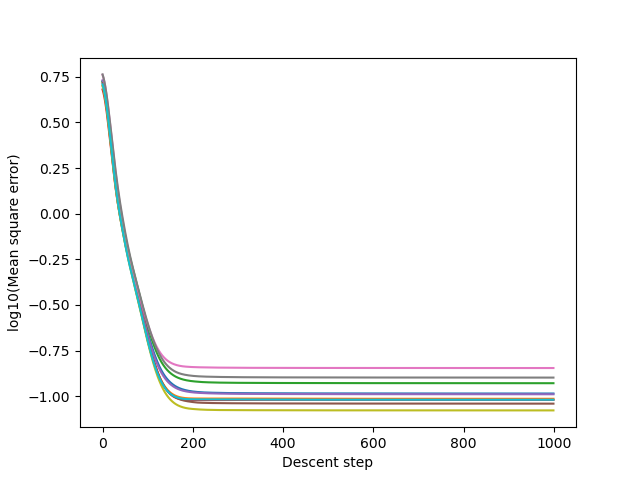

In [8]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:43,  1.71it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:40, 24.50it/s]

  3%|███▋                                                                                                                                           | 26/1000 [00:00<00:20, 46.55it/s]

  4%|█████▌                                                                                                                                         | 39/1000 [00:00<00:14, 64.96it/s]

  5%|███████▍                                                                                                                                       | 52/1000 [00:01<00:11, 79.67it/s]

  6%|█████████▏                                                                                                                                     | 64/1000 [00:01<00:10, 89.92it/s]

  8%|██████████▉                                                                                                                                   | 77/1000 [00:01<00:09, 100.19it/s]

  9%|████████████▉                                                                                                                                 | 91/1000 [00:01<00:08, 108.87it/s]

 10%|██████████████▋                                                                                                                              | 104/1000 [00:01<00:07, 113.00it/s]

 12%|████████████████▍                                                                                                                            | 117/1000 [00:01<00:07, 115.82it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:07, 118.04it/s]

 14%|████████████████████▏                                                                                                                        | 143/1000 [00:01<00:07, 119.29it/s]

 16%|█████████████████████▉                                                                                                                       | 156/1000 [00:01<00:07, 118.13it/s]

 17%|███████████████████████▊                                                                                                                     | 169/1000 [00:01<00:07, 118.60it/s]

 18%|█████████████████████████▋                                                                                                                   | 182/1000 [00:02<00:06, 120.13it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:06, 123.64it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:06, 123.48it/s]

 22%|███████████████████████████████▌                                                                                                             | 224/1000 [00:02<00:06, 128.95it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:05, 128.00it/s]

 25%|███████████████████████████████████▎                                                                                                         | 250/1000 [00:02<00:05, 128.56it/s]

 26%|█████████████████████████████████████▏                                                                                                       | 264/1000 [00:02<00:05, 129.08it/s]

 28%|███████████████████████████████████████                                                                                                      | 277/1000 [00:02<00:05, 129.02it/s]

 29%|████████████████████████████████████████▉                                                                                                    | 290/1000 [00:02<00:05, 122.60it/s]

 30%|██████████████████████████████████████████▋                                                                                                  | 303/1000 [00:03<00:05, 123.79it/s]

 32%|████████████████████████████████████████████▌                                                                                                | 316/1000 [00:03<00:05, 123.80it/s]

 33%|██████████████████████████████████████████████▍                                                                                              | 329/1000 [00:03<00:05, 123.81it/s]

 34%|████████████████████████████████████████████████▏                                                                                            | 342/1000 [00:03<00:05, 118.14it/s]

 35%|█████████████████████████████████████████████████▉                                                                                           | 354/1000 [00:03<00:05, 117.22it/s]

 37%|███████████████████████████████████████████████████▋                                                                                         | 367/1000 [00:03<00:05, 120.28it/s]

 38%|█████████████████████████████████████████████████████▌                                                                                       | 380/1000 [00:03<00:05, 121.99it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                     | 393/1000 [00:03<00:05, 118.41it/s]

 40%|█████████████████████████████████████████████████████████                                                                                    | 405/1000 [00:03<00:05, 105.14it/s]

 42%|██████████████████████████████████████████████████████████▊                                                                                  | 417/1000 [00:04<00:05, 106.65it/s]

 43%|████████████████████████████████████████████████████████████▍                                                                                | 429/1000 [00:04<00:05, 108.32it/s]

 44%|██████████████████████████████████████████████████████████████                                                                               | 440/1000 [00:04<00:05, 106.54it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                             | 451/1000 [00:04<00:05, 100.67it/s]

 46%|█████████████████████████████████████████████████████████████████▏                                                                           | 462/1000 [00:04<00:05, 102.15it/s]

 48%|██████████████████████████████████████████████████████████████████▉                                                                          | 475/1000 [00:04<00:04, 108.56it/s]

 49%|████████████████████████████████████████████████████████████████████▊                                                                        | 488/1000 [00:04<00:04, 113.78it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                      | 502/1000 [00:04<00:04, 118.91it/s]

 52%|████████████████████████████████████████████████████████████████████████▌                                                                    | 515/1000 [00:04<00:04, 119.83it/s]

 53%|██████████████████████████████████████████████████████████████████████████▍                                                                  | 528/1000 [00:05<00:03, 118.10it/s]

 54%|████████████████████████████████████████████████████████████████████████████▏                                                                | 540/1000 [00:05<00:03, 116.28it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▊                                                               | 552/1000 [00:05<00:03, 117.24it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                             | 564/1000 [00:05<00:04, 107.32it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▋                                                            | 575/1000 [00:05<00:04, 97.25it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████                                                           | 585/1000 [00:05<00:04, 91.84it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 597/1000 [00:05<00:04, 98.17it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▊                                                       | 609/1000 [00:05<00:03, 101.96it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████                                                      | 620/1000 [00:05<00:04, 93.30it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 630/1000 [00:06<00:04, 87.59it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 639/1000 [00:06<00:04, 84.36it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 649/1000 [00:06<00:03, 88.16it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████                                                | 662/1000 [00:06<00:03, 98.53it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 675/1000 [00:06<00:03, 106.80it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████                                            | 688/1000 [00:06<00:02, 112.21it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 700/1000 [00:06<00:02, 106.37it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 711/1000 [00:06<00:02, 99.39it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 722/1000 [00:07<00:02, 98.31it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 732/1000 [00:07<00:02, 96.84it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 745/1000 [00:07<00:02, 104.70it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 758/1000 [00:07<00:02, 111.16it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 770/1000 [00:07<00:02, 113.65it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 783/1000 [00:07<00:01, 118.20it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 796/1000 [00:07<00:01, 119.31it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 808/1000 [00:07<00:01, 118.58it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 821/1000 [00:07<00:01, 120.72it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 834/1000 [00:07<00:01, 122.25it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 847/1000 [00:08<00:01, 121.88it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 860/1000 [00:08<00:01, 123.34it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 873/1000 [00:08<00:01, 124.64it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 886/1000 [00:08<00:00, 125.24it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 899/1000 [00:08<00:00, 120.80it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:08<00:00, 117.41it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 924/1000 [00:08<00:00, 112.67it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:08<00:00, 114.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:08<00:00, 119.53it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:09<00:00, 120.50it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 977/1000 [00:09<00:00, 121.65it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 990/1000 [00:09<00:00, 123.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.41it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

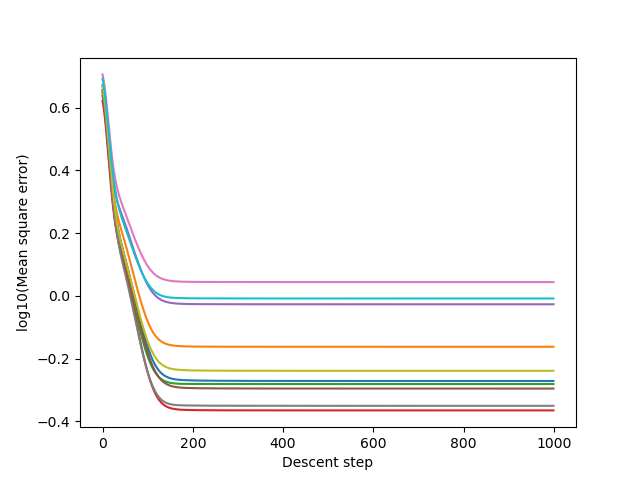

In [9]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<11:31,  1.44it/s]

  1%|▊                                                                                                                                               | 6/1000 [00:00<01:44,  9.48it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:00<00:58, 16.97it/s]

  2%|██▏                                                                                                                                            | 15/1000 [00:01<00:45, 21.77it/s]

  2%|██▋                                                                                                                                            | 19/1000 [00:01<00:37, 25.84it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:01<00:33, 29.11it/s]

  3%|████                                                                                                                                           | 28/1000 [00:01<00:28, 33.99it/s]

  3%|████▋                                                                                                                                          | 33/1000 [00:01<00:25, 37.56it/s]

  4%|█████▍                                                                                                                                         | 38/1000 [00:01<00:23, 40.26it/s]

  4%|██████▏                                                                                                                                        | 43/1000 [00:01<00:22, 42.05it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:21, 43.71it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:21, 44.78it/s]

  6%|████████▎                                                                                                                                      | 58/1000 [00:01<00:20, 45.41it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:02<00:20, 45.39it/s]

  7%|█████████▋                                                                                                                                     | 68/1000 [00:02<00:22, 41.30it/s]

  7%|██████████▍                                                                                                                                    | 73/1000 [00:02<00:25, 35.73it/s]

  8%|███████████                                                                                                                                    | 77/1000 [00:02<00:28, 32.06it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:02<00:38, 23.67it/s]

  8%|████████████                                                                                                                                   | 84/1000 [00:02<00:38, 23.75it/s]

  9%|████████████▍                                                                                                                                  | 87/1000 [00:03<00:37, 24.05it/s]

  9%|████████████▊                                                                                                                                  | 90/1000 [00:03<00:38, 23.73it/s]

  9%|█████████████▎                                                                                                                                 | 93/1000 [00:03<00:36, 24.91it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:03<00:35, 25.34it/s]

 10%|██████████████▏                                                                                                                               | 100/1000 [00:03<00:31, 28.25it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:03<00:26, 33.16it/s]

 11%|███████████████▌                                                                                                                              | 110/1000 [00:03<00:24, 36.97it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:03<00:22, 38.77it/s]

 12%|████████████████▉                                                                                                                             | 119/1000 [00:04<00:22, 38.38it/s]

 12%|█████████████████▍                                                                                                                            | 123/1000 [00:04<00:22, 38.51it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:04<00:21, 40.64it/s]

 13%|██████████████████▉                                                                                                                           | 133/1000 [00:04<00:20, 41.99it/s]

 14%|███████████████████▌                                                                                                                          | 138/1000 [00:04<00:21, 41.01it/s]

 14%|████████████████████▎                                                                                                                         | 143/1000 [00:04<00:21, 39.43it/s]

 15%|████████████████████▊                                                                                                                         | 147/1000 [00:04<00:21, 39.09it/s]

 15%|█████████████████████▍                                                                                                                        | 151/1000 [00:04<00:21, 39.02it/s]

 16%|██████████████████████                                                                                                                        | 155/1000 [00:04<00:21, 38.89it/s]

 16%|██████████████████████▋                                                                                                                       | 160/1000 [00:05<00:20, 40.31it/s]

 16%|███████████████████████▍                                                                                                                      | 165/1000 [00:05<00:19, 41.96it/s]

 17%|████████████████████████▏                                                                                                                     | 170/1000 [00:05<00:19, 43.31it/s]

 18%|████████████████████████▊                                                                                                                     | 175/1000 [00:05<00:18, 44.22it/s]

 18%|█████████████████████████▌                                                                                                                    | 180/1000 [00:05<00:18, 44.91it/s]

 18%|██████████████████████████▎                                                                                                                   | 185/1000 [00:05<00:18, 42.98it/s]

 19%|██████████████████████████▉                                                                                                                   | 190/1000 [00:05<00:18, 43.86it/s]

 20%|███████████████████████████▋                                                                                                                  | 195/1000 [00:05<00:17, 44.74it/s]

 20%|████████████████████████████▍                                                                                                                 | 200/1000 [00:05<00:17, 45.16it/s]

 20%|█████████████████████████████                                                                                                                 | 205/1000 [00:06<00:17, 45.35it/s]

 21%|█████████████████████████████▊                                                                                                                | 210/1000 [00:06<00:17, 45.59it/s]

 22%|██████████████████████████████▌                                                                                                               | 215/1000 [00:06<00:17, 45.84it/s]

 22%|███████████████████████████████▏                                                                                                              | 220/1000 [00:06<00:17, 44.07it/s]

 22%|███████████████████████████████▉                                                                                                              | 225/1000 [00:06<00:17, 44.74it/s]

 23%|████████████████████████████████▋                                                                                                             | 230/1000 [00:06<00:17, 45.29it/s]

 24%|█████████████████████████████████▎                                                                                                            | 235/1000 [00:06<00:16, 45.68it/s]

 24%|██████████████████████████████████                                                                                                            | 240/1000 [00:06<00:16, 45.82it/s]

 24%|██████████████████████████████████▊                                                                                                           | 245/1000 [00:06<00:16, 46.40it/s]

 25%|███████████████████████████████████▌                                                                                                          | 250/1000 [00:07<00:16, 44.30it/s]

 26%|████████████████████████████████████▏                                                                                                         | 255/1000 [00:07<00:16, 44.87it/s]

 26%|████████████████████████████████████▉                                                                                                         | 260/1000 [00:07<00:16, 45.17it/s]

 26%|█████████████████████████████████████▋                                                                                                        | 265/1000 [00:07<00:16, 45.61it/s]

 27%|██████████████████████████████████████▎                                                                                                       | 270/1000 [00:07<00:15, 46.06it/s]

 28%|███████████████████████████████████████                                                                                                       | 275/1000 [00:07<00:15, 46.35it/s]

 28%|███████████████████████████████████████▊                                                                                                      | 280/1000 [00:07<00:15, 46.39it/s]

 28%|████████████████████████████████████████▍                                                                                                     | 285/1000 [00:07<00:15, 46.52it/s]

 29%|█████████████████████████████████████████▏                                                                                                    | 290/1000 [00:07<00:15, 46.54it/s]

 30%|█████████████████████████████████████████▉                                                                                                    | 295/1000 [00:07<00:15, 45.55it/s]

 30%|██████████████████████████████████████████▌                                                                                                   | 300/1000 [00:08<00:16, 43.58it/s]

 30%|███████████████████████████████████████████▎                                                                                                  | 305/1000 [00:08<00:15, 44.36it/s]

 31%|████████████████████████████████████████████                                                                                                  | 310/1000 [00:08<00:15, 44.89it/s]

 32%|████████████████████████████████████████████▋                                                                                                 | 315/1000 [00:08<00:15, 45.45it/s]

 32%|█████████████████████████████████████████████▍                                                                                                | 320/1000 [00:08<00:14, 45.70it/s]

 32%|██████████████████████████████████████████████▏                                                                                               | 325/1000 [00:08<00:15, 44.48it/s]

 33%|██████████████████████████████████████████████▊                                                                                               | 330/1000 [00:08<00:14, 44.88it/s]

 34%|███████████████████████████████████████████████▌                                                                                              | 335/1000 [00:08<00:14, 45.59it/s]

 34%|████████████████████████████████████████████████▎                                                                                             | 340/1000 [00:08<00:14, 45.96it/s]

 34%|████████████████████████████████████████████████▉                                                                                             | 345/1000 [00:09<00:14, 46.34it/s]

 35%|█████████████████████████████████████████████████▋                                                                                            | 350/1000 [00:09<00:13, 46.61it/s]

 36%|██████████████████████████████████████████████████▍                                                                                           | 355/1000 [00:09<00:13, 46.69it/s]

 36%|███████████████████████████████████████████████████                                                                                           | 360/1000 [00:09<00:13, 47.29it/s]

 36%|███████████████████████████████████████████████████▊                                                                                          | 365/1000 [00:09<00:13, 47.81it/s]

 37%|████████████████████████████████████████████████████▌                                                                                         | 370/1000 [00:09<00:13, 47.21it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                        | 375/1000 [00:09<00:13, 47.36it/s]

 38%|█████████████████████████████████████████████████████▉                                                                                        | 380/1000 [00:09<00:13, 47.08it/s]

 38%|██████████████████████████████████████████████████████▋                                                                                       | 385/1000 [00:09<00:13, 46.91it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                      | 390/1000 [00:10<00:13, 46.81it/s]

 40%|████████████████████████████████████████████████████████                                                                                      | 395/1000 [00:10<00:12, 46.84it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                     | 400/1000 [00:10<00:12, 46.78it/s]

 40%|█████████████████████████████████████████████████████████▌                                                                                    | 405/1000 [00:10<00:14, 41.52it/s]

 41%|██████████████████████████████████████████████████████████▏                                                                                   | 410/1000 [00:10<00:14, 39.85it/s]

 42%|██████████████████████████████████████████████████████████▉                                                                                   | 415/1000 [00:10<00:15, 37.81it/s]

 42%|███████████████████████████████████████████████████████████▍                                                                                  | 419/1000 [00:10<00:15, 37.00it/s]

 42%|████████████████████████████████████████████████████████████                                                                                  | 423/1000 [00:10<00:16, 34.44it/s]

 43%|████████████████████████████████████████████████████████████▋                                                                                 | 427/1000 [00:11<00:17, 32.44it/s]

 43%|█████████████████████████████████████████████████████████████▏                                                                                | 431/1000 [00:11<00:18, 30.48it/s]

 44%|█████████████████████████████████████████████████████████████▊                                                                                | 435/1000 [00:11<00:19, 29.25it/s]

 44%|██████████████████████████████████████████████████████████████▎                                                                               | 439/1000 [00:11<00:18, 29.73it/s]

 44%|██████████████████████████████████████████████████████████████▉                                                                               | 443/1000 [00:11<00:17, 31.46it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                              | 448/1000 [00:11<00:15, 35.15it/s]

 45%|████████████████████████████████████████████████████████████████▏                                                                             | 452/1000 [00:11<00:15, 36.35it/s]

 46%|████████████████████████████████████████████████████████████████▉                                                                             | 457/1000 [00:11<00:14, 37.41it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:12<00:15, 35.52it/s]

 46%|██████████████████████████████████████████████████████████████████                                                                            | 465/1000 [00:12<00:14, 36.32it/s]

 47%|██████████████████████████████████████████████████████████████████▌                                                                           | 469/1000 [00:12<00:14, 36.61it/s]

 47%|███████████████████████████████████████████████████████████████████▎                                                                          | 474/1000 [00:12<00:13, 37.60it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                          | 479/1000 [00:12<00:13, 38.91it/s]

 48%|████████████████████████████████████████████████████████████████████▋                                                                         | 484/1000 [00:12<00:12, 40.20it/s]

 49%|█████████████████████████████████████████████████████████████████████▍                                                                        | 489/1000 [00:12<00:12, 39.38it/s]

 49%|██████████████████████████████████████████████████████████████████████▏                                                                       | 494/1000 [00:12<00:12, 40.69it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                       | 499/1000 [00:13<00:12, 41.05it/s]

 50%|███████████████████████████████████████████████████████████████████████▌                                                                      | 504/1000 [00:13<00:12, 39.58it/s]

 51%|████████████████████████████████████████████████████████████████████████▏                                                                     | 508/1000 [00:13<00:14, 34.46it/s]

 51%|████████████████████████████████████████████████████████████████████████▋                                                                     | 512/1000 [00:13<00:14, 33.97it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                    | 516/1000 [00:13<00:13, 35.02it/s]

 52%|█████████████████████████████████████████████████████████████████████████▉                                                                    | 521/1000 [00:13<00:12, 38.15it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                   | 526/1000 [00:13<00:12, 39.39it/s]

 53%|███████████████████████████████████████████████████████████████████████████▍                                                                  | 531/1000 [00:13<00:11, 41.38it/s]

 54%|████████████████████████████████████████████████████████████████████████████                                                                  | 536/1000 [00:14<00:11, 41.18it/s]

 54%|████████████████████████████████████████████████████████████████████████████▊                                                                 | 541/1000 [00:14<00:11, 39.44it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▍                                                                | 545/1000 [00:14<00:12, 36.09it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▉                                                                | 549/1000 [00:14<00:12, 36.18it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▌                                                               | 553/1000 [00:14<00:12, 36.07it/s]

 56%|███████████████████████████████████████████████████████████████████████████████                                                               | 557/1000 [00:14<00:12, 36.48it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▊                                                              | 562/1000 [00:14<00:11, 38.44it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                             | 566/1000 [00:14<00:12, 36.05it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▉                                                             | 570/1000 [00:14<00:12, 34.78it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                            | 574/1000 [00:15<00:12, 35.30it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                           | 579/1000 [00:15<00:11, 38.11it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▊                                                           | 583/1000 [00:15<00:10, 38.29it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                          | 587/1000 [00:15<00:10, 38.58it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 592/1000 [00:15<00:10, 39.43it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                         | 596/1000 [00:15<00:10, 39.54it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 600/1000 [00:15<00:10, 37.71it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▊                                                        | 604/1000 [00:15<00:13, 30.40it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▎                                                       | 608/1000 [00:16<00:12, 31.29it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▉                                                       | 612/1000 [00:16<00:11, 33.35it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                      | 617/1000 [00:16<00:10, 36.17it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 622/1000 [00:16<00:09, 37.84it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████                                                     | 627/1000 [00:16<00:09, 39.64it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 632/1000 [00:16<00:09, 39.09it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 636/1000 [00:16<00:09, 36.62it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 640/1000 [00:16<00:10, 33.88it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 644/1000 [00:17<00:10, 32.90it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████                                                  | 648/1000 [00:17<00:11, 31.91it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 653/1000 [00:17<00:10, 33.92it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 657/1000 [00:17<00:10, 33.28it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 661/1000 [00:17<00:10, 32.96it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 666/1000 [00:17<00:09, 35.99it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 671/1000 [00:17<00:08, 37.71it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 676/1000 [00:17<00:08, 38.91it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 680/1000 [00:18<00:08, 36.09it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 684/1000 [00:18<00:09, 34.22it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 688/1000 [00:18<00:08, 34.75it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 692/1000 [00:18<00:08, 35.86it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 697/1000 [00:18<00:07, 38.16it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 702/1000 [00:18<00:07, 39.91it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 707/1000 [00:18<00:08, 34.49it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 711/1000 [00:18<00:08, 32.59it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 716/1000 [00:19<00:07, 36.05it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 720/1000 [00:19<00:07, 36.96it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 724/1000 [00:19<00:07, 37.62it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 728/1000 [00:19<00:07, 36.89it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 732/1000 [00:19<00:08, 29.99it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 736/1000 [00:19<00:11, 23.27it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 739/1000 [00:20<00:17, 14.88it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 743/1000 [00:20<00:14, 18.24it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 747/1000 [00:20<00:11, 21.12it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 751/1000 [00:20<00:10, 24.35it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 756/1000 [00:20<00:08, 28.43it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 761/1000 [00:20<00:07, 31.31it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 765/1000 [00:20<00:07, 31.13it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 769/1000 [00:21<00:07, 32.89it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 773/1000 [00:21<00:06, 34.62it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 777/1000 [00:21<00:06, 35.65it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 781/1000 [00:21<00:05, 36.52it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 785/1000 [00:21<00:05, 36.27it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 789/1000 [00:21<00:06, 32.77it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 793/1000 [00:21<00:06, 31.66it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 797/1000 [00:21<00:06, 31.89it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 801/1000 [00:22<00:06, 31.86it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 805/1000 [00:22<00:08, 23.74it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 808/1000 [00:22<00:07, 24.33it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 812/1000 [00:22<00:07, 26.17it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 816/1000 [00:22<00:06, 27.97it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 819/1000 [00:22<00:06, 28.42it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 823/1000 [00:22<00:05, 30.78it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 828/1000 [00:23<00:05, 33.80it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 832/1000 [00:23<00:04, 35.10it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 836/1000 [00:23<00:04, 36.00it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 841/1000 [00:23<00:04, 37.63it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 845/1000 [00:23<00:04, 36.28it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 849/1000 [00:23<00:04, 31.40it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 853/1000 [00:23<00:04, 33.25it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 858/1000 [00:23<00:03, 36.52it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 863/1000 [00:23<00:03, 39.04it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 868/1000 [00:24<00:03, 40.93it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 873/1000 [00:24<00:02, 42.46it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 878/1000 [00:24<00:02, 42.84it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 883/1000 [00:24<00:02, 40.03it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 888/1000 [00:24<00:02, 38.79it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 892/1000 [00:24<00:03, 35.89it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 896/1000 [00:24<00:02, 34.84it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 900/1000 [00:24<00:02, 34.54it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 904/1000 [00:25<00:02, 34.52it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 908/1000 [00:25<00:02, 34.36it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 913/1000 [00:25<00:02, 36.84it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 917/1000 [00:25<00:02, 37.38it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:25<00:02, 37.28it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 925/1000 [00:25<00:02, 36.67it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 929/1000 [00:25<00:02, 33.56it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 933/1000 [00:25<00:02, 32.51it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:25<00:01, 34.22it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 941/1000 [00:26<00:01, 34.10it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 945/1000 [00:26<00:01, 34.91it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 949/1000 [00:26<00:01, 35.31it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 953/1000 [00:26<00:01, 35.89it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:26<00:01, 36.11it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 961/1000 [00:26<00:01, 36.99it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 965/1000 [00:26<00:01, 33.46it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 969/1000 [00:26<00:00, 32.02it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:27<00:01, 26.33it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 977/1000 [00:27<00:00, 28.49it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 982/1000 [00:27<00:00, 32.13it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:27<00:00, 33.56it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 990/1000 [00:27<00:00, 34.31it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 994/1000 [00:27<00:00, 35.21it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:27<00:00, 36.10it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.90it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

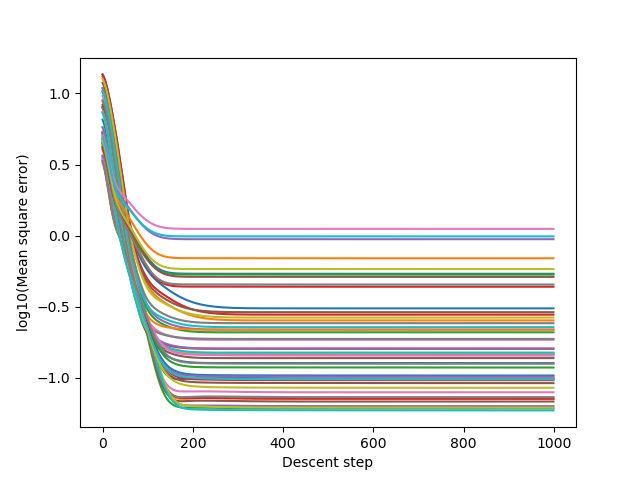

In [10]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

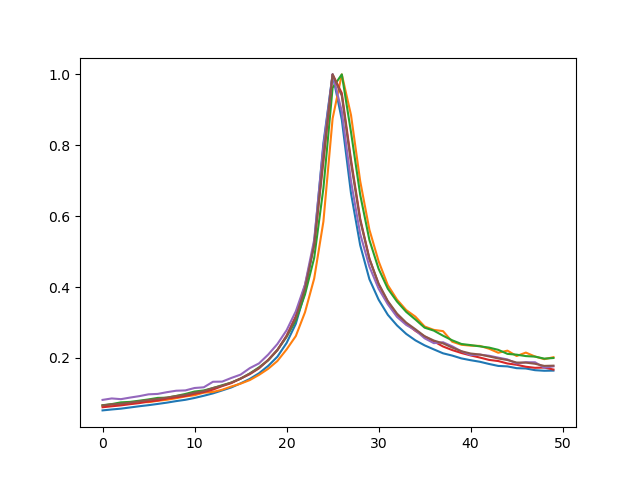

In [11]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [12]:
# Save
np.savetxt('../../data/calibration_mem1.txt', iq1.membg)
np.savetxt('../../data/calibration_mem2.txt', iq2.membg)
np.savetxt('../../data/calibration_mem3.txt', iq3.membg)
np.savetxt('../../data/calibration_mem4.txt', iq4.membg)
np.savetxt('../../data/calibration_mem5.txt', iq5.membg)
np.savetxt('../../data/calibration_mem6.txt', iq6.membg)